Исследовательский вопрос: Как взаимосвязаны характеристики фирмы с вовлечённостью данной фирмы в процесс “озеленения” производства?

Гипотеза: Компании большего размера более вовлечены в “озеленение” производства


In [55]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Установим уровень значимости для проверки гипотез равный $0.01$ просто потому что


In [56]:
ALPHA = 0.01

In [57]:
df = pd.read_excel("../Google Chrome/added_index.xlsx")
df.head()

,Unnamed: 0,id,a4a,a6a,a2,a0,b1,b5,b7a,d1a1x,...,BMGc23j,BMGc24,BMGc25,BMGc27,BMGd6,BMGd7,BMGe1,BMGe2,BMGe2u,ecology_index
0,0,22,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2007,0,Производство Готовых Строительных Металлически...,...,0,Модернизация машин и оборудования,1,NaN,0,0,100000,20000,Литры,4
1,1,29,Машины и оборудование,Крупный,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2002,0,Производство Насосов И Компрессоров,...,0,Модернизация машин и оборудования,0,Не является приоритетом по сравнению с другими...,0,0,160000,18500,Литры,3
2,2,34,Другое Производство,Средний,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2005,0,"Производство Алюминиевых И Медных Проводов, Си...",...,0,NaN,0,Нехватка финансовых ресурсов,0,0,Не знаю,Не знаю,NaN,0
3,3,50,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2015,0,Строительство жилых и нежилых зданий,...,0,NaN,0,Операционный и/ или технический риск,0,0,Не знаю,Не знаю,NaN,0
4,4,56,Другие Услуги,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2002,0,Оптовая Продажа Офисной Мебели,...,0,Модернизация машин и оборудования,0,Нехватка финансовых ресурсов,0,0,100000,10000,Литры,2


Выделяем группы компаний по размеру бизнеса (переменная a6a)


In [58]:
small = df[df["a6a"] == "Малый"]
average = df[df["a6a"] == "Средний"]
big = df[df["a6a"] == "Крупный"]

Text(0.5, 0.98, 'Распределение индекса вовлеченности в "озеленение" производства')

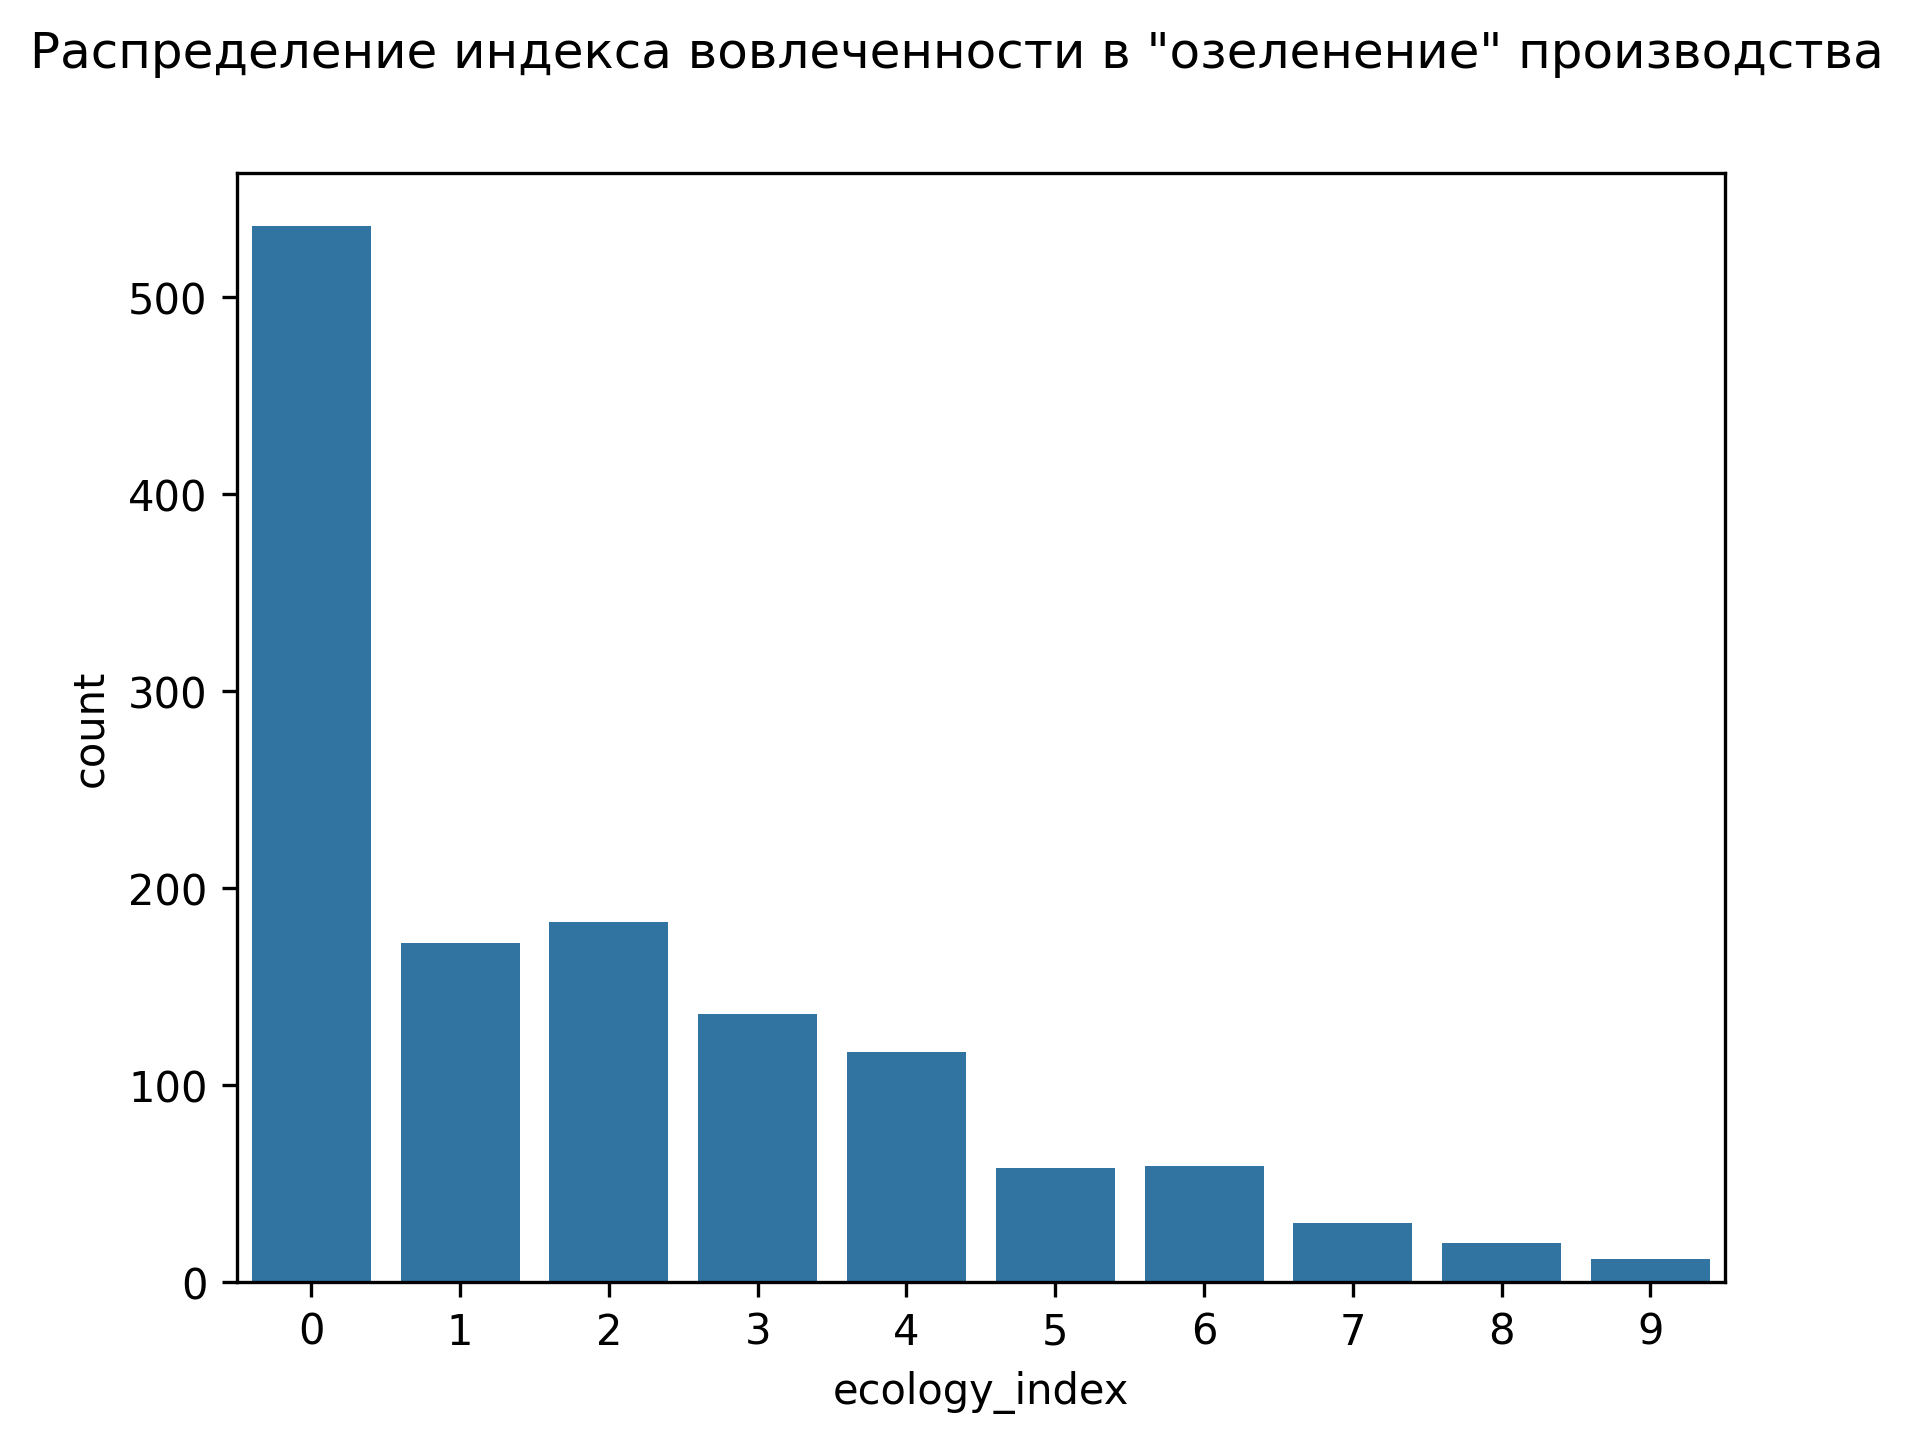

In [59]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.countplot(data=df, x="ecology_index", ax=ax)
fig.suptitle('Распределение индекса вовлеченности в "озеленение" производства')

На всякий случай убедимся, что индекс не распределен нормально с помощью критерия Шапиро-Уилка


In [60]:
stats.shapiro(small["ecology_index"])

ShapiroResult(statistic=0.7561044692993164, pvalue=4.40271051960822e-27)

Проверим, что распределение индекса вовлеченности в "озеленение" производства различается между группами с помощью критерия Краскела-Уоллиса


In [61]:
stats.kruskal(small["ecology_index"], average["ecology_index"], big["ecology_index"])

KruskalResult(statistic=117.20371910938883, pvalue=3.544343183580764e-26)

Сравним попарно значения индекса для всех размеров компаний с попощью U-критерия Манна-Уитни


In [62]:
print(
    small["ecology_index"].mean(),
    average["ecology_index"].mean(),
    "p-value:",
    stats.mannwhitneyu(small["ecology_index"], average["ecology_index"]).pvalue,
)

1.1854684512428297 1.835 p-value: 1.3306987657133372e-07


In [63]:
print(
    average["ecology_index"].mean(),
    big["ecology_index"].mean(),
    "p-value:",
    stats.mannwhitneyu(average["ecology_index"], big["ecology_index"]).pvalue,
)

1.835 2.955 p-value: 1.0463673608414995e-08


In [64]:
print(
    small["ecology_index"].mean(),
    big["ecology_index"].mean(),
    "p-value:",
    stats.mannwhitneyu(small["ecology_index"], big["ecology_index"]).pvalue,
)

1.1854684512428297 2.955 p-value: 3.1062060152137574e-26


Применим к значениям p-value поправку Бонферрони (домножим на количество подгрупп) или stats.false_discovery_control, после этого сравним и с установленным значением уровня значимости `ALPHA`


In [65]:
print(
    stats.false_discovery_control(
        [
            stats.mannwhitneyu(small["ecology_index"], big["ecology_index"]).pvalue,
            stats.mannwhitneyu(small["ecology_index"], average["ecology_index"]).pvalue,
            stats.mannwhitneyu(average["ecology_index"], big["ecology_index"]).pvalue,
        ]
    )
    < ALPHA
)

print(
    np.array(
        [
            stats.mannwhitneyu(small["ecology_index"], big["ecology_index"]).pvalue,
            stats.mannwhitneyu(small["ecology_index"], average["ecology_index"]).pvalue,
            stats.mannwhitneyu(average["ecology_index"], big["ecology_index"]).pvalue,
        ]
    )
    * 3
    < ALPHA
)

[ True  True  True]
[ True  True  True]


Из того, что средние значения индекса с увеличением размера комании тоже возрастают и p-value меньше $\alpha$, делаем вывод, что гипотеза не опровергается


Проверим гипотезу на устойчивость по федеральным округам


In [66]:
for fo in df["a2"].unique():
    if all(
        [
            stats.mannwhitneyu(small["ecology_index"], big["ecology_index"]).pvalue
            < ALPHA,
            stats.mannwhitneyu(small["ecology_index"], average["ecology_index"]).pvalue
            < ALPHA,
            stats.mannwhitneyu(average["ecology_index"], big["ecology_index"]).pvalue
            < ALPHA,
            small["ecology_index"].mean() < average["ecology_index"].mean(),
            average["ecology_index"].mean() < big["ecology_index"].mean(),
        ]
    ):
        print(
            "ok\t",
            fo,
        )
    else:
        print("not ok\t", fo)

ok	 Центральный Федеральный округ
ok	 Северо-Западный федеральный округ
ok	 Сибирский федеральный округ
ok	 Дальневосточный федеральный округ
ok	 Южный федеральный округ и Северо-Кавказский федеральный округ
ok	 Уральский федеральный округ
ok	 Приволжский федеральный округ


In [73]:
df.groupby('a4a').id.count()

a4a
Готовые Металлические Изделия           141
Другие Услуги                           264
Другое Производство                     180
Еда                                     157
Машины и оборудование                   139
Неметаллические Минеральные продукты    142
Предметы одежды                         141
Розничная торговля                      159
Name: id, dtype: int64